In [41]:
import pandas as pd

#Prepare DataFrame
df = pd.read_csv('../data/BCCC-CIRA-CIC-DoHBrw-2020.csv')


In [42]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Explorative Data Analysis

# Check for null values
#print(df.isnull().sum())

# Fill null values with mean
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean())

# Encode categorical data
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

print(df['Label'].head())
print(encoder.classes_)

#df.describe()

# random forest
# grid search
# svm

# cross validation

# Multi colinearity - maybe remove repeated 

# the input to variance_inflation_factor should be a dataframe of all numeric, non-categorical variables
# numeric_df = df_encoded.select_dtypes(include=[np.number])

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
# vif["features"] = numeric_df.columns

# print(vif)

# Pairplot
#sns.pairplot(df_encoded, vars=[])


0    0
1    1
2    1
3    0
4    0
Name: Label, dtype: int32
['Benign' 'Malicious']


In [43]:
from sklearn.model_selection import train_test_split
#Divide Data

# Target variable is 'Label'
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
from sklearn.tree import DecisionTreeClassifier

#Train Model

model = DecisionTreeClassifier()

# Fit model directly on training data
model.fit(X_train, y_train)



DecisionTreeClassifier()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict
import numpy as np

#Evaluate Model

# Without cross validation results
y_pred = model.predict(X_test)

# Storing results in variables
accuracy_score_decision_tree = accuracy_score(y_test, y_pred)

# print("Directly on test data results:")
# print("Accuracy:\n", accuracy_score(y_test, y_pred))

# '''
# Confusion Matrix
# ----------- predicted ------------
# a                 |
# c   TRUE POSITIVE | FALSE NEGATIVE
# t                 |
# u -------------------------------
# a   FALSE POSITIVE| TRUE NEGATIVE
# l                 |        
# '''
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# cv=5 represents K in K-Fold cross validation
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Storing results in variables
accuracy_score_decision_tree_cv = accuracy_score(y, y_pred_cv)

print("Cross validation results:")
print("Accuracy:\n", accuracy_score(y, y_pred_cv))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_cv))
print("Classification Report:\n", classification_report(y, y_pred_cv))

Cross validation results:
Accuracy:
 0.9994510184209366
Confusion Matrix:
 [[249416    137]
 [   137 249416]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    249553
           1       1.00      1.00      1.00    249553

    accuracy                           1.00    499106
   macro avg       1.00      1.00      1.00    499106
weighted avg       1.00      1.00      1.00    499106



In [46]:
from sklearn import tree
import matplotlib.pyplot as plt

#Visualize Decision Tree

plt.figure(figsize=(120,120))  
tree.plot_tree(model, filled=True)
plt.show()



c:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


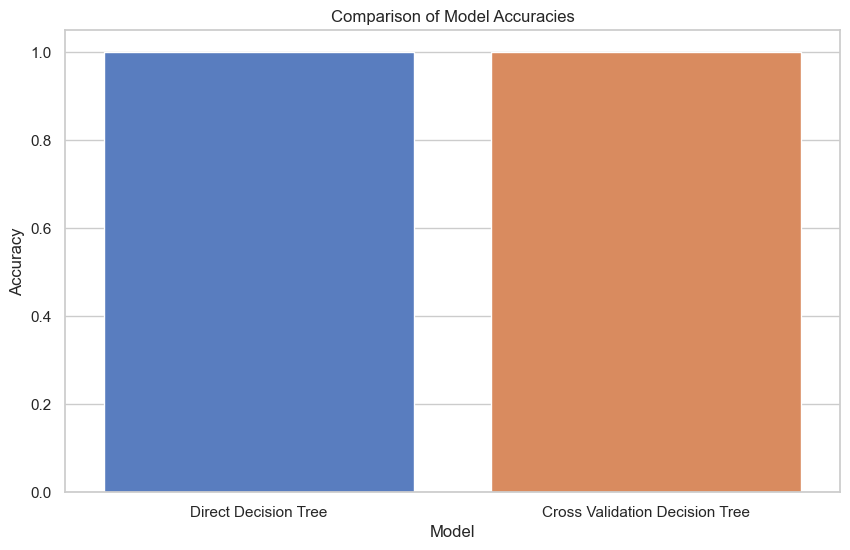

In [49]:
import seaborn as sns

accuracies = [accuracy_score_decision_tree, accuracy_score_decision_tree_cv] 
model_names = ['Direct Decision Tree', 'Cross Validation Decision Tree'] 

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="muted")
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


Markdown ## MARKDOWN